In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy.stats import chisquare
import scipy.stats as ss
import os

In [99]:
#path = "C:\\Users\\Gil\\Documents\\GitHub\\K_Titanic"
path = "C:\\Users\\gilsanto\\OneDrive - Nokia\\1 - Docs Pessoais\\8 - Kaggle\\K_Titanic\\K_Titanic"
os.chdir(path)

# Datasets

In [100]:
gender_submission = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


# Heads

In [92]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test.Fare.unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [16]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

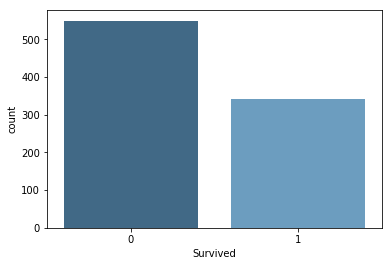

In [18]:
sns.countplot('Survived',data=train,palette="Blues_d")
plt.show()

## Univariable Analysis

### Sex

In [19]:
train[['Sex','Survived']].groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


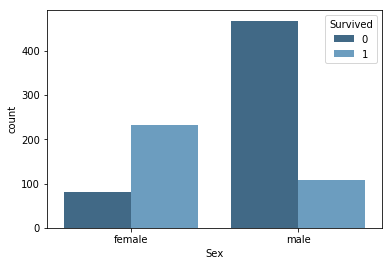

In [20]:
sns.countplot('Sex',hue='Survived',data=train,palette="Blues_d")

### Age 

In [21]:
bins= [0,10,20,30,40,50,60,70,80,90]
labels = [0,1,2,3,4,5,6,7,8]

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


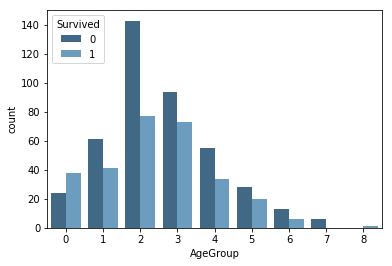

In [22]:
sns.countplot('AgeGroup',hue='Survived',data=train,palette="Blues_d")

### Pclass

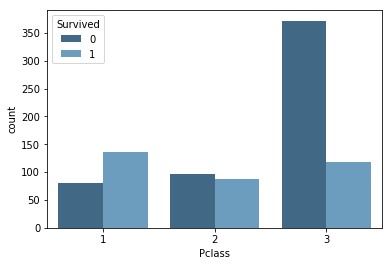

In [23]:
sns.countplot('Pclass',hue='Survived',data=train,palette="Blues_d")

### SibSp

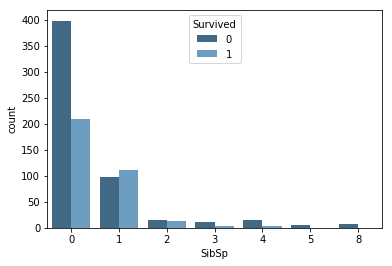

In [24]:
sns.countplot('SibSp',hue='Survived',data=train,palette="Blues_d")

## Multivariable analysis

### Class vs gender

In [25]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [26]:
pd.crosstab([train.Sex,train.Survived],train.SibSp,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\gilsanto\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


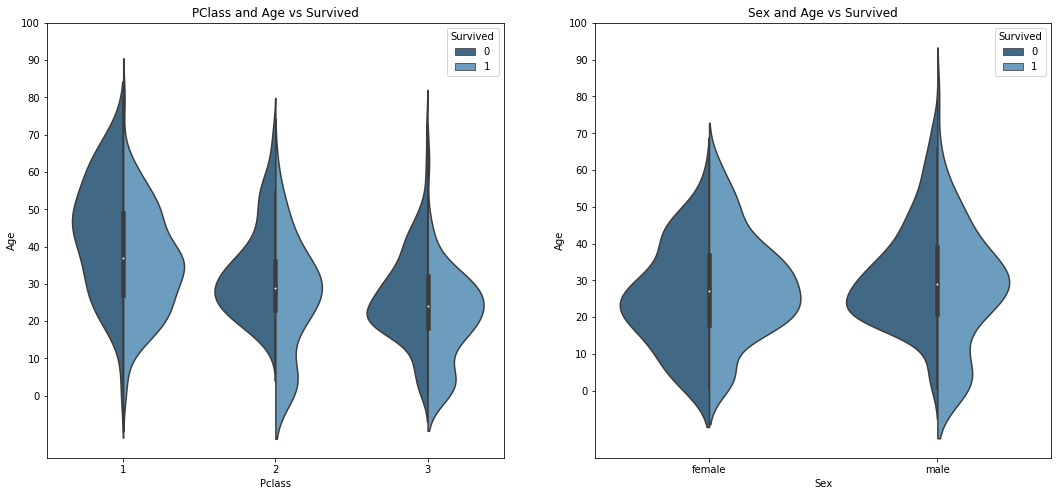

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True,ax=ax[0],palette="Blues_d")
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1],palette="Blues_d")
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

 There are tickets with negative price!

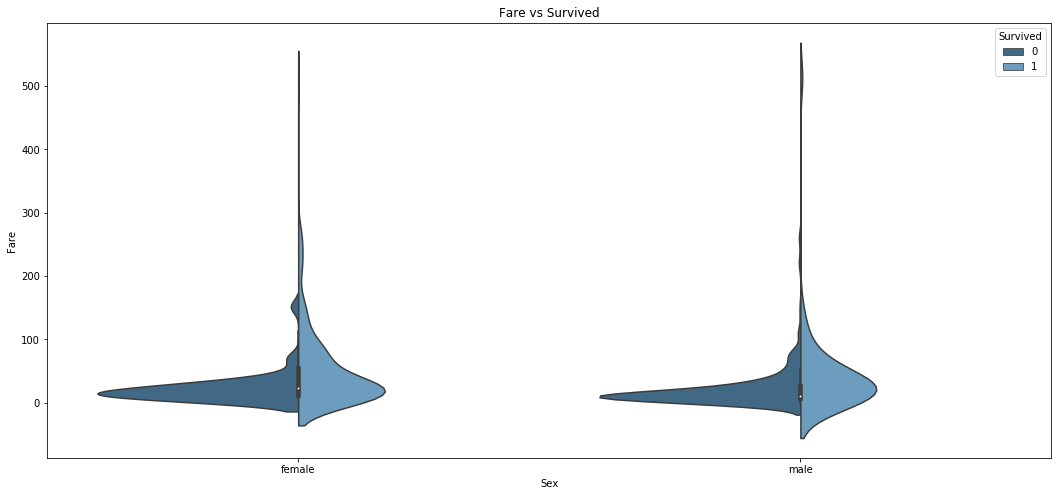

In [28]:
f,ax=plt.subplots(1,1,figsize=(18,8));
sns.violinplot('Sex','Fare',hue='Survived',data=train,split=True,ax=ax,palette="Blues_d");
ax.set_title('Fare vs Survived');
ax.set_yticks(range(0,540,100));

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [97]:
# change Categoric variables to code int8
train = train.assign(Pclass=train['Pclass'].astype('category'))
train = train.assign(Cabin=train['Cabin'].astype('category'))
train = train.assign(Embarked=train['Embarked'].astype('category'))
train = train.assign(Sex=train['Sex'].astype('category'))

train["AgeGroup_c"] = train["AgeGroup"].cat.codes
train["Pclass_c"] = train["Pclass"].cat.codes
train["Cabin_c"] = train["Cabin"].cat.codes
train["Embarked_c"] = train["Embarked"].cat.codes
train["Sex_c"] = train["Sex"].cat.codes

In [45]:
# Get the columns for the model and correlation matrix
train_m = train[["Pclass_c","Sex_c", "AgeGroup_c", "SibSp", "Parch", "Fare", "Cabin_c", "Embarked_c"]]

In [32]:
train_m.dtypes

Pclass_c         int8
Sex_c            int8
AgeGroup_c       int8
SibSp           int64
Parch           int64
Fare          float64
Cabin_c          int8
Embarked_c       int8
dtype: object

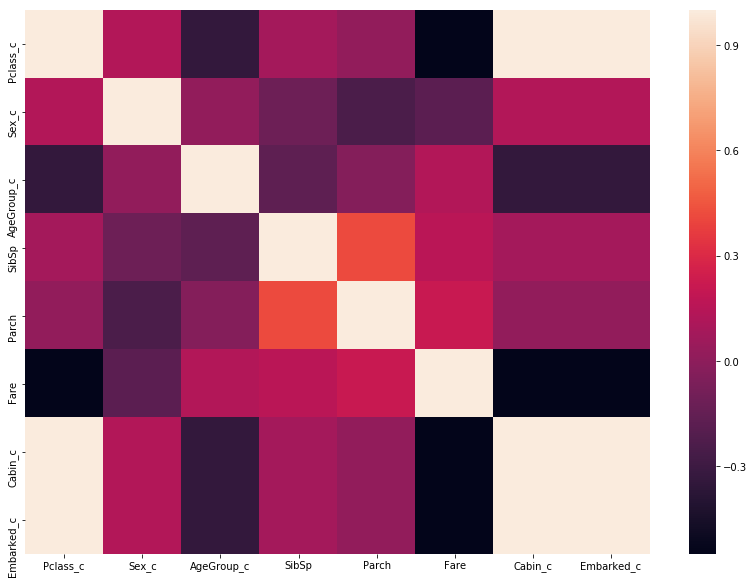

In [33]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(train_m.corr())

## Fill Missing Values

In [34]:
# To complete after building model pipeline

In [41]:
print(train.shape)
print(test.shape)

(891, 18)
(418, 11)


(891, 18)
(418, 11)


## Scalling

Params to use: Pclass_c, sex, AgeGroup, SibSp, Parch, Fare, Cabin_c, Embarked_c

In [63]:
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

In [53]:
test_m_s.head()

,Pclass_c,Sex_c,AgeGroup_c,SibSp,Parch,Fare,Cabin_c,Embarked_c
0,0.827377,0.737695,0.090151,0.432793,-0.473674,-0.502445,0.827377,0.827377
1,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.786845,-1.566107,-1.566107
2,0.827377,-1.355574,0.090151,-0.474545,-0.473674,-0.488854,0.827377,0.827377
3,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.420730,-1.566107,-1.566107
4,0.827377,0.737695,0.605054,-0.474545,-0.473674,-0.486337,0.827377,0.827377


In [37]:
train_m_scaled = preprocessing.scale(train_m)
train_m_scaled = pd.DataFrame(train_m_scaled,columns=list(train_m))
train_m_scaled.head()

C:\Users\gilsanto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Pclass_c,Sex_c,AgeGroup_c,SibSp,Parch,Fare,Cabin_c,Embarked_c
0,0.827377,0.737695,0.090151,0.432793,-0.473674,-0.502445,0.827377,0.827377
1,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.786845,-1.566107,-1.566107
2,0.827377,-1.355574,0.090151,-0.474545,-0.473674,-0.488854,0.827377,0.827377
3,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.420730,-1.566107,-1.566107
4,0.827377,0.737695,0.605054,-0.474545,-0.473674,-0.486337,0.827377,0.827377


## Running Code
### Adding previous transformations to a block

In [101]:
def preprocessing_titanic(df):
    
    # Group age by decades
    bins= [0,10,20,30,40,50,60,70,80,90]
    labels = [0,1,2,3,4,5,6,7,8]
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    # change Categoric variables to code int8
    df = df.assign(Pclass=df['Pclass'].astype('category'))
    df = df.assign(Cabin=df['Cabin'].astype('category'))
    df = df.assign(Embarked=df['Embarked'].astype('category'))
    df = df.assign(Sex=df['Sex'].astype('category'))

    df["AgeGroup_c"] = df["AgeGroup"].cat.codes
    df["Pclass_c"] = df["Pclass"].cat.codes
    df["Cabin_c"] = df["Cabin"].cat.codes
    df["Embarked_c"] = df["Embarked"].cat.codes
    df["Sex_c"] = df["Sex"].cat.codes

    # Get the columns for the model and correlation matrix
    df_m = df[["Pclass_c","Sex_c", "AgeGroup_c", "SibSp", "Parch", "Fare", "Cabin_c", "Embarked_c"]]
    df_m_s = preprocessing.scale(df_m)
    df_m_s = pd.DataFrame(df_m_s,columns=list(df_m))
    
    return df_m_s


train_m_s = preprocessing_titanic(train)
test_m_s = preprocessing_titanic(test)

C:\Users\gilsanto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by the scale function.
C:\Users\gilsanto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by the scale function.


### Training the model

In [54]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_m_s, train["Survived"])

### Predictions
Prediction in the training data (overfitted)

In [80]:
# make predictions 
expected = train["Survived"]
predicted = clf.predict(train_m_s)

# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
print(metrics.confusion_matrix(expected, predicted)) 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       549
           1       0.97      0.90      0.93       342

   micro avg       0.95      0.95      0.95       891
   macro avg       0.96      0.94      0.95       891
weighted avg       0.95      0.95      0.95       891

[[539  10]
 [ 33 309]]


Prediction in the test data

There is one null value in Fare

In [110]:
test_m_s.fillna(0, inplace=True)
test_m_s.isnull().sum()

Pclass_c      0
Sex_c         0
AgeGroup_c    0
SibSp         0
Parch         0
Fare          0
Cabin_c       0
Embarked_c    0
dtype: int64

In [112]:
# make predictions 
test["Survived"] = clf.predict(test_m_s)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0


### Save CSV

In [122]:
results = test[["PassengerId", "Survived"]]
results.to_csv(path_or_buf = "Results/Results_Titanic_{}.csv".format(date.today()), index=False)


In [121]:
    from datetime import date
    today = date.today()
    print("Today's date:", today)
    
print("Results_Titanic_{}.csv".format(date.today()))

Today's date: 2019-12-24
Results_Titanic_2019-12-24.csv


## Random

In [64]:
from sklearn import datasets 
# load the iris datasets 
dataset = datasets.load_iris() 

In [71]:
titanic = {}

In [74]:
titanic["data"] = train_m_s
titanic["target"] = train["Survived"]

In [79]:
titanic["data"].head()

,Pclass_c,Sex_c,AgeGroup_c,SibSp,Parch,Fare,Cabin_c,Embarked_c
0,0.827377,0.737695,0.090151,0.432793,-0.473674,-0.502445,0.827377,0.827377
1,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.786845,-1.566107,-1.566107
2,0.827377,-1.355574,0.090151,-0.474545,-0.473674,-0.488854,0.827377,0.827377
3,-1.566107,-1.355574,0.605054,0.432793,-0.473674,0.420730,-1.566107,-1.566107
4,0.827377,0.737695,0.605054,-0.474545,-0.473674,-0.486337,0.827377,0.827377


In [20]:
# Frequency Table

ZAHO_tab = pd.crosstab(index=ZAHO["ALARM"], columns="Count")
ZAHO_tab['Proportion'] = ZAHO_tab["Count"] / sum(ZAHO_tab["Count"])
ZAHO_tab['Percent'] = (ZAHO_tab["Count"] / sum(ZAHO_tab["Count"])) * 100

ZAHO_tab = ZAHO_tab.T

ZAHO_tab['Max'] = ZAHO_tab.max(axis=1)
ZAHO_tab['Min'] = ZAHO_tab.min(axis=1)
ZAHO_tab['Total'] = ZAHO_tab.iloc[:, :-2].sum(axis=1)

ZAHO_tab

ALARM,ABIS LINK USER CONFIGURATION FAILURE,AC MAINS FAIL,AC PHASE FAIL,ADJACENT CELL IDENTIFIER CONFIGURATION ERROR,AIRCON 1 FAIL,AIRCON 2 FAIL,AIRCRAFT FAIL,AIS RECEIVED,ALARM DIFFERENCE BETWEEN BSC AND OMC,ALARM SYSTEM FILE ERROR,...,UNEQUIPPED A INTERFACE CIRCUIT,UNEQUIPPED SDH LOWER ORDER PATH SIGNAL,UNEQUIPPED SDH VC SIGNAL,UNKNOWN LAN CONNECTION DETECTED,UNKNOWN POTENTIALLY INTERFERING CELL FOR DFCA,UNSOLICITED DATA LINK RE-ESTABLISHMENT,XML EVENT FILE BUFFER OVERFLOW,Max,Min,Total
col_0,,,,,,,,,,,,,,,,,,,,,
Count,36.000000,1.000000,1.000000,220.000000,1.000000,1.000000,1.000000,103.000000,11.000000,3.000000,...,30.000000,184.000000,6.000000,6.000000,105.000000,29.000000,3.000000,345.000000,1.000000,2375.0
Proportion,0.015158,0.000421,0.000421,0.092632,0.000421,0.000421,0.000421,0.043368,0.004632,0.001263,...,0.012632,0.077474,0.002526,0.002526,0.044211,0.012211,0.001263,0.145263,0.000421,1.0
Percent,1.515789,0.042105,0.042105,9.263158,0.042105,0.042105,0.042105,4.336842,0.463158,0.126316,...,1.263158,7.747368,0.252632,0.252632,4.421053,1.221053,0.126316,14.526316,0.042105,100.0


In [23]:
# Factorization and Cleaning

ZAHO = ZAHO_df.copy()

ZAHO["ALARM"] = pd.factorize(ZAHO['ALARM'])[0]
ZAHO["ALARM NUMBER"] = ZAHO["ALARM NUMBER"].map(lambda x: x if pd.isnull(x) else int(str(x).lstrip('(').rstrip(')')))
ZAHO["ALARM TYPE"] = ZAHO["ALARM TYPE"].replace({'^[?]+$' : np.nan}, regex=True)
ZAHO = ZAHO.dropna(subset=["ALARM TYPE", "HW", "Type Issue", "SUPPLEMENTARY"])
ZAHO["ALARM TYPE"] = pd.factorize(ZAHO['ALARM TYPE'])[0]
ZAHO["EVENT TYPE"] = pd.factorize(ZAHO['ALARM TYPE'])[0]
ZAHO["G/I"] = pd.factorize(ZAHO['G/I'])[0]
ZAHO["HANDLER"] = pd.factorize(ZAHO['HANDLER'])[0]
ZAHO["HW"] = pd.factorize(ZAHO['HW'])[0]
ZAHO["PRB"] = pd.factorize(ZAHO['PRB'])[0]
ZAHO['SEVERITY'] = -(pd.factorize(ZAHO['SEVERITY'])[0] - 3)
ZAHO["SUPPLEMENTARY"] = pd.factorize(ZAHO['SUPPLEMENTARY'])[0]
ZAHO["Type Issue"] = pd.factorize(ZAHO['Type Issue'])[0] 
ZAHO["UNIT"] = pd.factorize(ZAHO['UNIT'])[0]
ZAHO["Element Type"] = pd.factorize(ZAHO['Element Type'])[0]

In [24]:
ZAHO.head()

,ALARM,ALARM ID,ALARM NUMBER,ALARM TYPE,DATE,EVENT TYPE,Element Type,G/I,HANDLER,HOUR,HW,PRB,SEVERITY,SUPPLEMENTARY,Type Issue,UNIT
0,0,2915,102,0,2016-11-22,0,0,0,0,14:42:37.68,0,0,3,0,0,0
1,0,2915,107,0,2016-10-21,0,0,0,0,22:26:31.24,1,0,3,1,0,1
2,0,2915,109,0,2016-11-24,0,0,0,0,13:18:17.80,0,0,3,2,0,2
3,0,2915,110,0,2017-01-27,0,0,0,0,16:37:29.72,1,0,3,3,0,3
4,0,2915,112,0,2016-12-01,0,0,0,0,17:20:21.40,1,0,3,4,0,4


In [25]:
ZAHO["ALARM TYPE"].value_counts()

0    538
1    359
2      2
Name: ALARM TYPE, dtype: int64

In [26]:
ZAHO["HW"].value_counts()

0     180
1     146
8      85
16     56
4      55
5      54
24     36
13     36
9      35
28     31
15     26
2      23
7      22
26     18
27     16
3      12
25     11
11     10
23      9
10      9
22      9
18      5
12      4
21      3
6       3
17      2
20      1
19      1
14      1
Name: HW, dtype: int64

In [27]:
(ZAHO <= 0).any()

ALARM             True
ALARM ID         False
ALARM NUMBER     False
ALARM TYPE        True
DATE              True
EVENT TYPE        True
Element Type      True
G/I               True
HANDLER           True
HOUR              True
HW                True
PRB               True
SEVERITY         False
SUPPLEMENTARY     True
Type Issue        True
UNIT              True
dtype: bool

In [28]:
ZAHO["ALARM TYPE"].value_counts()

0    538
1    359
2      2
Name: ALARM TYPE, dtype: int64

In [29]:
ZAHO.dtypes

ALARM             int64
ALARM ID          int64
ALARM NUMBER      int64
ALARM TYPE        int64
DATE             object
EVENT TYPE        int64
Element Type      int64
G/I               int64
HANDLER           int64
HOUR             object
HW                int64
PRB               int64
SEVERITY          int64
SUPPLEMENTARY     int64
Type Issue        int64
UNIT              int64
dtype: object

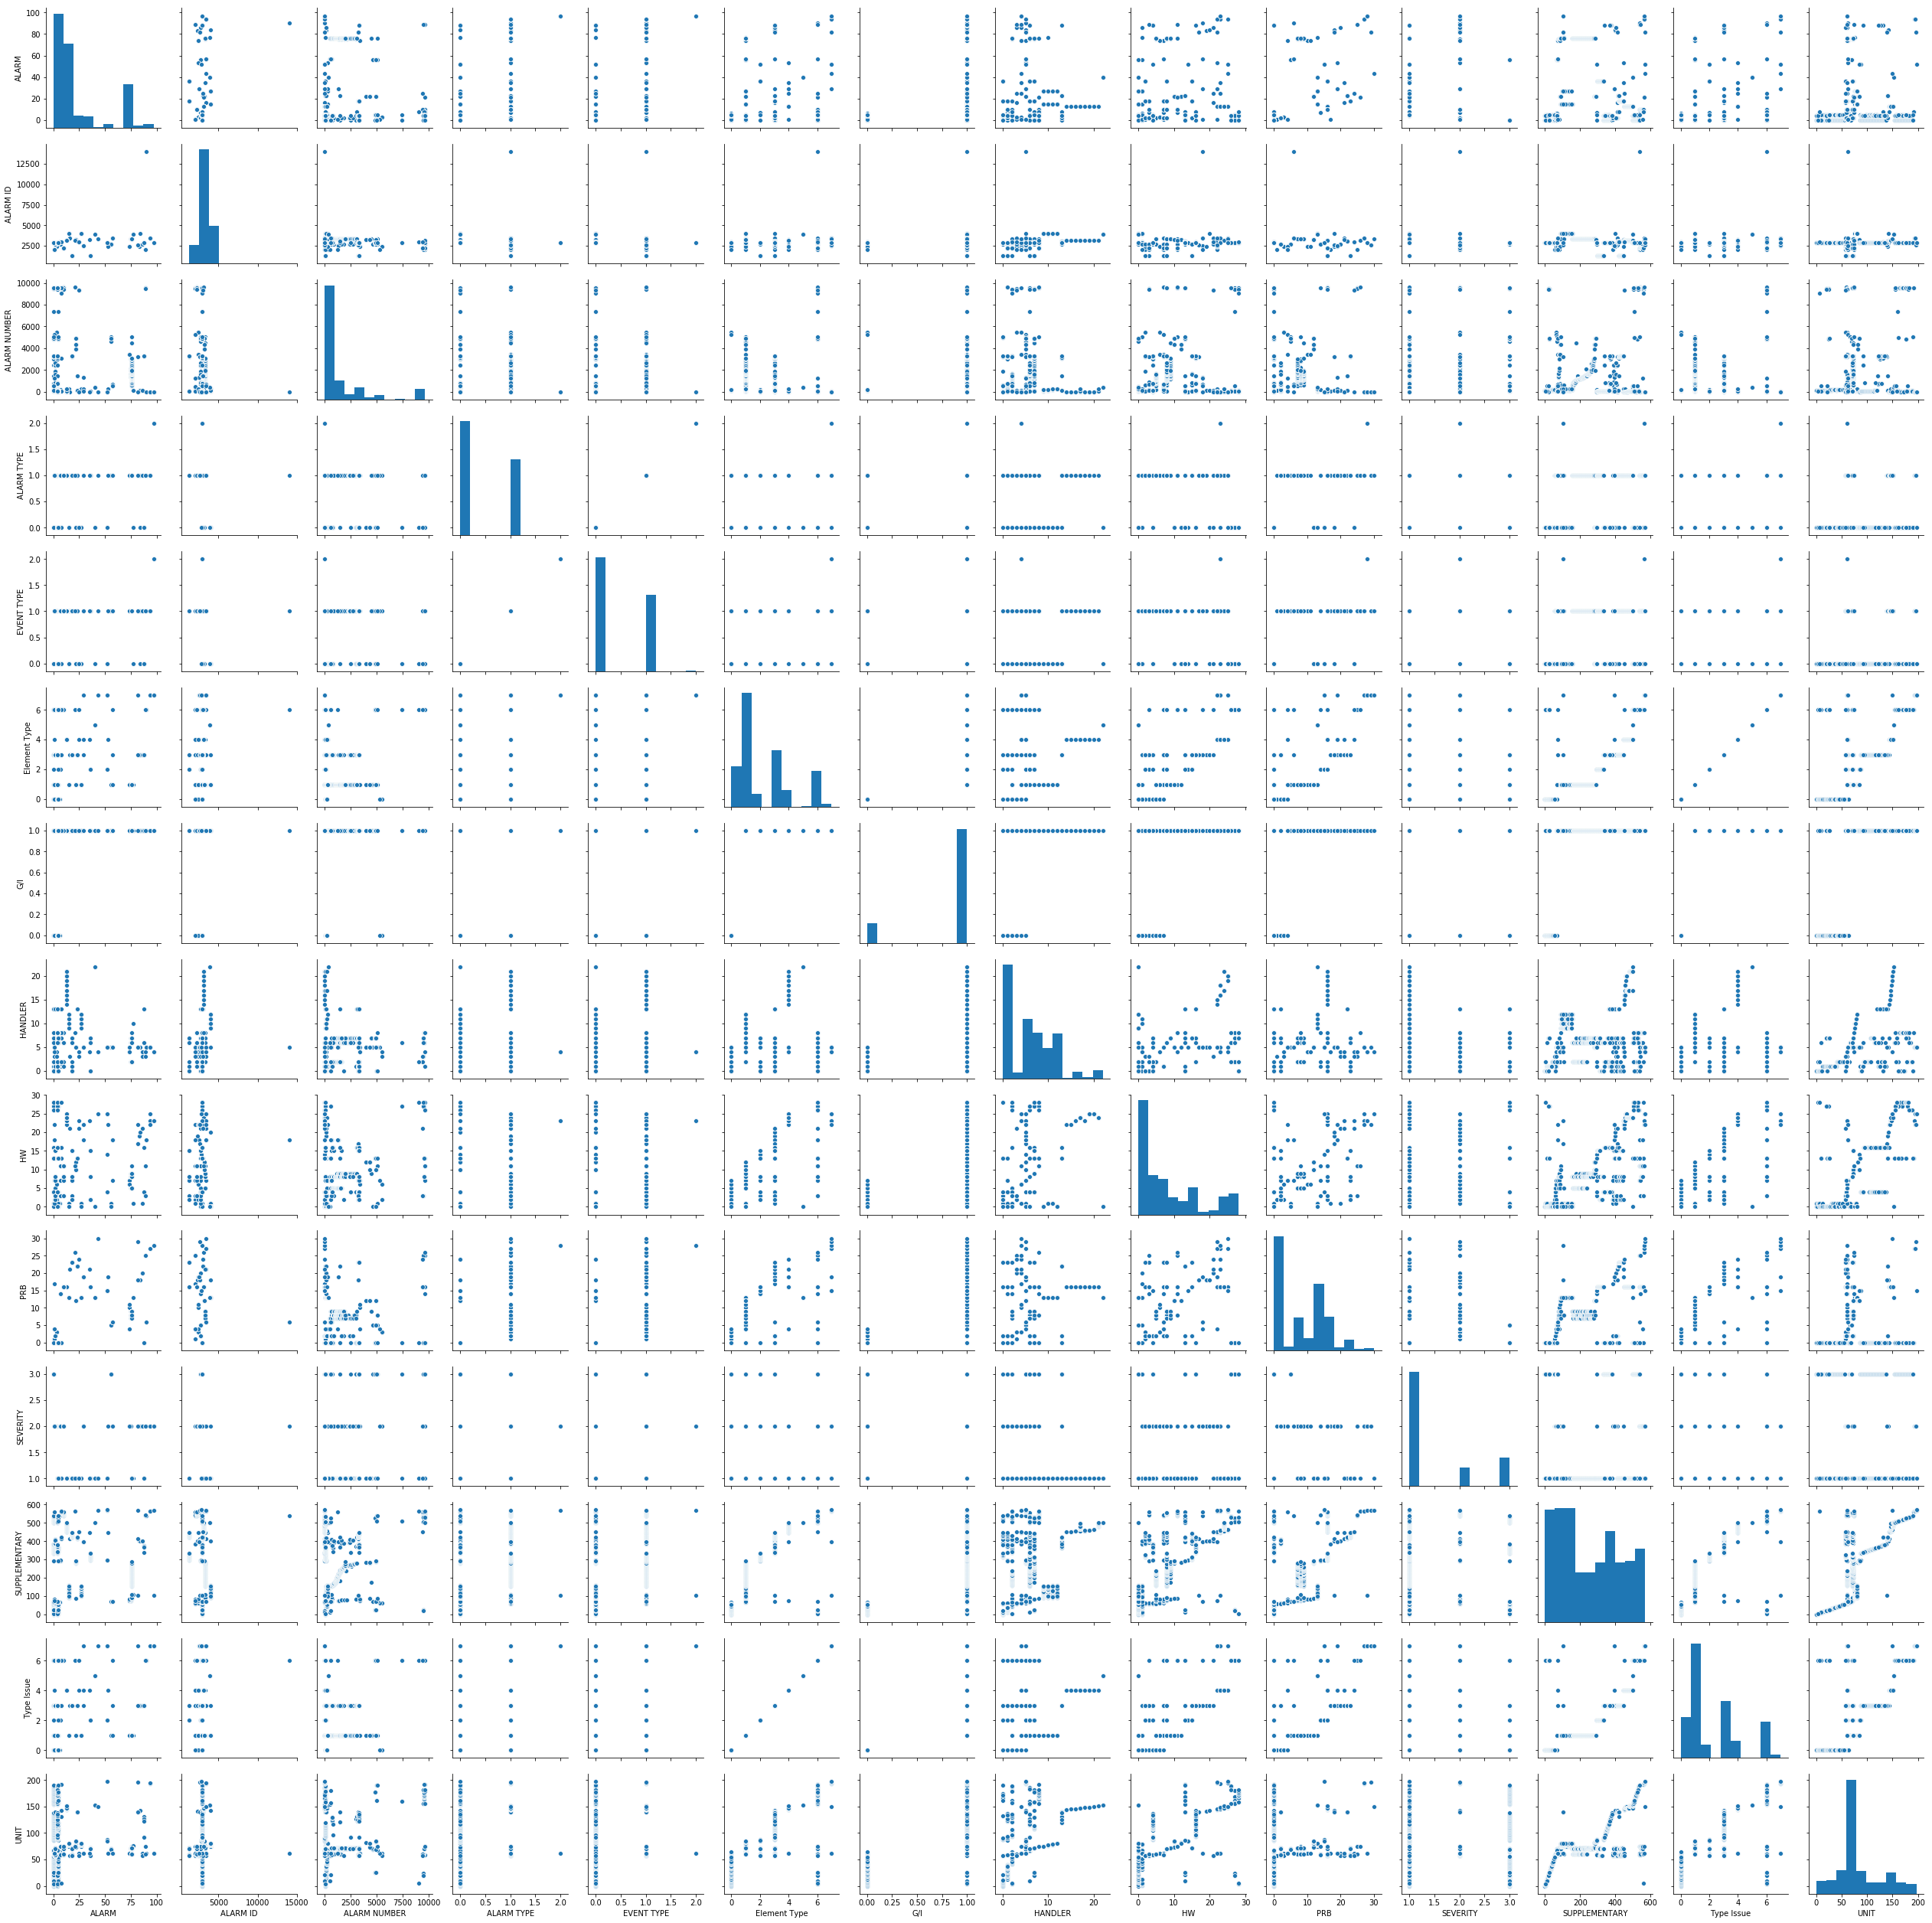

In [30]:
sns.pairplot(ZAHO)

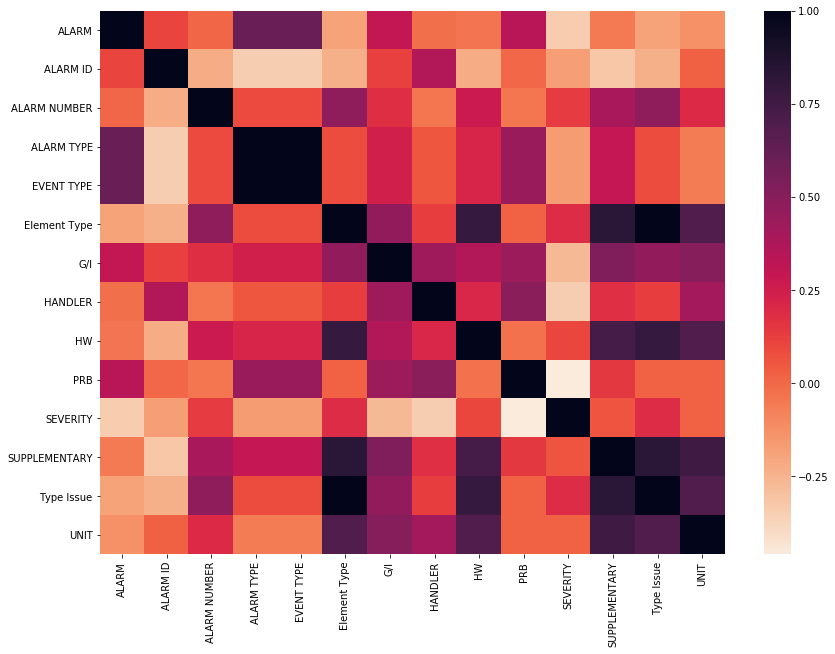

In [31]:
f, ax = plt.subplots(figsize=(14, 10)), sns.heatmap(ZAHO.corr(), cmap = sns.cm.rocket_r)

In [35]:
print(ZAHO)

      ALARM  ALARM ID  ALARM NUMBER  ALARM TYPE        DATE  EVENT TYPE  \
0         0      2915           102           0  2016-11-22           0   
1         0      2915           107           0  2016-10-21           0   
2         0      2915           109           0  2016-11-24           0   
3         0      2915           110           0  2017-01-27           0   
4         0      2915           112           0  2016-12-01           0   
5         0      2915           114           0  2017-01-27           0   
6         0      2915           116           0  2017-01-27           0   
7         0      2915           118           0  2016-12-26           0   
8         0      2915           119           0  2016-12-13           0   
9         0      2915           121           0  2016-12-13           0   
10        0      2915           123           0  2016-12-14           0   
11        0      2915           124           0  2016-12-14           0   
12        0      2915    

In [32]:
ZAHO.corr(method='pearson', min_periods=1)

,ALARM,ALARM ID,ALARM NUMBER,ALARM TYPE,EVENT TYPE,Element Type,G/I,HANDLER,HW,PRB,SEVERITY,SUPPLEMENTARY,Type Issue,UNIT
ALARM,1.000000,0.106265,0.008910,0.606308,0.606308,-0.188269,0.302863,-0.014753,-0.033390,0.335935,-0.334871,-0.052983,-0.188269,-0.124235
ALARM ID,0.106265,1.000000,-0.220493,-0.344410,-0.344410,-0.232764,0.117778,0.360253,-0.220123,0.007973,-0.174272,-0.318819,-0.232764,0.027962
ALARM NUMBER,0.008910,-0.220493,1.000000,0.089066,0.089066,0.475381,0.184090,-0.041549,0.273393,-0.038068,0.138282,0.391765,0.475381,0.198993
ALARM TYPE,0.606308,-0.344410,0.089066,1.000000,1.000000,0.087139,0.245855,0.054101,0.215802,0.437388,-0.164315,0.294149,0.087139,-0.060059
EVENT TYPE,0.606308,-0.344410,0.089066,1.000000,1.000000,0.087139,0.245855,0.054101,0.215802,0.437388,-0.164315,0.294149,0.087139,-0.060059
Element Type,-0.188269,-0.232764,0.475381,0.087139,0.087139,1.000000,0.469221,0.132680,0.789365,0.021721,0.187938,0.834699,1.000000,0.692922
G/I,0.302863,0.117778,0.184090,0.245855,0.245855,0.469221,1.000000,0.428018,0.356064,0.430602,-0.269433,0.529875,0.469221,0.508064
HANDLER,-0.014753,0.360253,-0.041549,0.054101,0.054101,0.132680,0.428018,1.000000,0.208785,0.495341,-0.339921,0.175631,0.132680,0.410048
HW,-0.033390,-0.220123,0.273393,0.215802,0.215802,0.789365,0.356064,0.208785,1.000000,-0.020674,0.104743,0.732951,0.789365,0.694294
PRB,0.335935,0.007973,-0.038068,0.437388,0.437388,0.021721,0.430602,0.495341,-0.020674,1.000000,-0.459344,0.148998,0.021721,0.024025


In [33]:
ZAHO_num = ZAHO.loc[:, ~ZAHO.columns.isin(["DATE", "HOUR"])].apply(lambda x : x+1)

pd.DataFrame([chisquare(ZAHO[x].values,f_exp=ZAHO_num.values.T,axis=1)[0] for x in ZAHO_num])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.263462e+02,2.741600e+06,1.213240e+06,5.904447e+05,5.904447e+05,4.659205e+05,5.348515e+05,1.992078e+05,1.579507e+05,1.131713e+05,4.988675e+05,1.939707e+05,4.659205e+05,5.198551e+04
1,1.962333e+09,3.148249e-01,1.120284e+08,7.586014e+09,7.586014e+09,4.153862e+09,5.102442e+09,2.025286e+09,3.677606e+09,3.329448e+09,4.068590e+09,1.270707e+08,4.153862e+09,1.787211e+08
2,2.390256e+09,3.039599e+06,1.031885e+01,5.666235e+09,5.666235e+09,1.456240e+09,3.601059e+09,1.274517e+09,6.944241e+08,4.105389e+09,2.739626e+09,3.531244e+07,1.456240e+09,9.521588e+07
3,2.066188e+04,2.781414e+06,1.240686e+06,7.181667e+02,7.181667e+02,2.294645e+03,1.132500e+03,5.873863e+03,7.660395e+03,7.258480e+03,1.662083e+03,2.280357e+05,2.294645e+03,7.612697e+04
4,2.066188e+04,2.781414e+06,1.240686e+06,7.181667e+02,7.181667e+02,2.294645e+03,1.132500e+03,5.873863e+03,7.660395e+03,7.258480e+03,1.662083e+03,2.280357e+05,2.294645e+03,7.612697e+04
5,2.013589e+04,2.778171e+06,1.237596e+06,3.486167e+03,3.486167e+03,3.999048e+02,1.574000e+03,4.533633e+03,5.133604e+03,8.510924e+03,1.346583e+03,2.248424e+05,3.999048e+02,7.298256e+04
6,1.997566e+04,2.780602e+06,1.239877e+06,3.191667e+02,3.191667e+02,1.616905e+03,5.145000e+02,5.138802e+03,7.012866e+03,6.662194e+03,1.029500e+03,2.272266e+05,1.616905e+03,7.532001e+04
7,1.723837e+04,2.770932e+06,1.231188e+06,3.313667e+04,3.313667e+04,1.112735e+04,1.881200e+04,2.360024e+02,1.569729e+04,7.359501e+03,1.795925e+04,2.178359e+05,1.112735e+04,6.621552e+04
8,5.050305e+04,2.767308e+06,1.229985e+06,8.760267e+04,8.760267e+04,1.530033e+04,5.210400e+04,1.979844e+04,3.148508e+02,6.605641e+04,4.191683e+04,2.147200e+05,1.530033e+04,6.362493e+04
9,1.247696e+04,2.768096e+06,1.229670e+06,5.691867e+04,5.691867e+04,2.399684e+04,3.885300e+04,1.132694e+04,2.587224e+04,3.787275e+02,3.672042e+04,2.151553e+05,2.399684e+04,6.403717e+04


In [34]:
ZAHO.loc[:, ~ZAHO.columns.isin(["DATE", "HOUR"])].dtypes

ALARM            int64
ALARM ID         int64
ALARM NUMBER     int64
ALARM TYPE       int64
EVENT TYPE       int64
Element Type     int64
G/I              int64
HANDLER          int64
HW               int64
PRB              int64
SEVERITY         int64
SUPPLEMENTARY    int64
Type Issue       int64
UNIT             int64
dtype: object

In [ ]:
# Cramér’s V

def cramers_corrected_stat(confusion_matrix):
    
    """ Calculate Cramer's V for 
        categorial-categorial association.
        It allows us to understand correlation 
        between two categorical features in one data set. 
    """
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = (phi2 - ((k-1)*(r-1))/(n-1)) if phi2 - ((k-1)*(r-1))/(n-1) > 0 else 0 
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [ ]:
c_matrix = pd.crosstab(ZAHO["ALARM"], ZAHO["ALARM TYPE"])

cramers_corrected_stat(c_matrix)

# ALARM and ALARM TYPE + ALARM + EVENT TYPE are super correlated!

# ZAHP

In [ ]:
ZAHP_df.head()

In [ ]:
ZAHP_df['SEVERITY'].value_counts()

In [ ]:
ZAHP = ZAHP_df.copy()

ZAHP["SEVERITY"] = ZAHP["SEVERITY"].replace({'^[?]+$' : np.nan}, regex=True)
ZAHP = ZAHP.dropna(subset=["SEVERITY"])
ZAHP['SEVERITY'] = -(pd.factorize(ZAHP['SEVERITY'])[0] - 3)

ZAHP["ALARM"] = pd.factorize(ZAHP['ALARM'])[0]
ZAHP["ALARM TYPE"] = pd.factorize(ZAHP['ALARM TYPE'])[0]
ZAHP["EVENT TYPE"] = pd.factorize(ZAHP['ALARM TYPE'])[0]
ZAHP["G/I"] = pd.factorize(ZAHP['G/I'])[0]
ZAHP["HANDLER"] = pd.factorize(ZAHP['HANDLER'])[0]
ZAHP["HW"] = pd.factorize(ZAHP['HW'])[0]
ZAHP["PRB"] = pd.factorize(ZAHP['PRB'])[0]
ZAHP["SUPPLEMENTARY"] = pd.factorize(ZAHP['SUPPLEMENTARY'])[0]
ZAHP["Type Issue"] = pd.factorize(ZAHP['Type Issue'])[0] 
ZAHP["UNIT"] = pd.factorize(ZAHP['UNIT'])[0]
ZAHP["Element Type"] = pd.factorize(ZAHP['Element Type'])[0]

In [ ]:
ZAHP.head()

In [ ]:
f, ax = plt.subplots(figsize=(14, 10)), sns.heatmap(ZAHP.corr(), cmap = sns.cm.rocket_r)

In [ ]:
sns.pairplot(ZAHP)

In [ ]:
ZAHP['SEVERITY'].value_counts()

# ZDOI

In [ ]:
ZDOI_df.head()

In [ ]:
ZDOI_df.dtypes

In [ ]:
ZDOI_df["CLOCK FREQUENCY MHZ"].value_counts()

In [ ]:
ZDOI_df["LOAD PERCENT"].value_counts()

# ZDWQ

In [ ]:
ZDWQ_df.head()

In [ ]:
ZDWQ_df.dtypes

# ZEFO

In [ ]:
ZEFO_df.head()

In [ ]:
ZEFO = ZEFO_df.copy()

ZEFO["20W POWER LICENCE REQUESTED"] = ZEFO["20W POWER LICENCE REQUESTED"].str.split().str[0]
ZEFO["20W POWER LICENCE USAGE"] = ZEFO["20W POWER LICENCE USAGE"].str.split().str[0]
ZEFO["ABIS INTERFACE CONNECTION TYPE"] = ZEFO["ABIS INTERFACE CONNECTION TYPE"].str.split().str[0]
ZEFO["ABIS OVER IP ETHERNET USAGE"] = ZEFO["ABIS OVER IP ETHERNET USAGE"].str.split().str[0]
ZEFO["ADDITIONAL 2 E1/T1 IF"] = ZEFO["ADDITIONAL 2 E1/T1 IF"].str.split().str[0]

In [ ]:
ZEFO.head()

In [ ]:
ZEFO_df["ABIS INTERFACE CONNECTION TYPE"].value_counts()

In [ ]:
ZEFO_df.dtypes

In [ ]:
ZEFO_df.isnull().sum()

# ZEGO

In [ ]:
ZEGO_df.head()

In [ ]:
ZEGO_df.dtypes

In [ ]:
ZEGO_df["VALUE"].value_counts()

In [ ]:
ZEGO_df["PRESET VALUE"].value_counts()

In [ ]:
ZEGO_df["PARAMETER"].value_counts()

In [ ]:
ZEGO_preset = ZEGO_df[ZEGO_df["PRESET VALUE"].str.contains(".+ S$")]
ZEGO_preset['PRESET VALUE'].value_counts()

In [ ]:
ZEGO_preset.head()

# ZEOH

In [ ]:
ZEOH_df.head()

In [ ]:
ZEOH_df.dtypes

In [ ]:
ZEOH_df['ALARM NUMBER'].value_counts()

In [ ]:
ZEOH = ZEOH_df.copy()

ZEOH['ALARM NUMBER'] = ZEOH['ALARM NUMBER'].str[1:-1].apply(pd.to_numeric)
ZEOH.head()

In [ ]:
ZEOH.dtypes

In [ ]:
ZEOH.isnull().sum()

# ZEOL

In [ ]:
ZEOL_df.head()

In [ ]:
ZEOL_df.dtypes

In [ ]:
ZEOL = ZEOL_df.copy()

ZEOL['ALARM NUMBER'] = ZEOL['ALARM NUMBER'].str[1:-1].apply(pd.to_numeric)
ZEOL.head()

# ZFXI

In [ ]:
ZFXI_df.head()

In [ ]:
ZFXI_df.dtypes

In [ ]:
ZFXI_df.isnull().sum()

In [ ]:
ZFXI = ZFXI_df.copy()

ZFXI = ZFXI.dropna(subset=["NAME"])

ZFXI.head()

In [ ]:
ZFXI.isnull().sum()

# ZFXLPSE

In [ ]:
ZFXLPSE_df.head()

In [ ]:
ZFXLPSE_df.dtypes

In [ ]:
ZFXLPSE_df.shape

In [ ]:
ZFXLPSE_df.isnull().sum()

In [ ]:
ZFXLPSE_df["PS_SGSN_LOAD_BALANCING"].value_counts(dropna=False)

# ZQKB

In [ ]:
ZQKB_df.head()

In [ ]:
ZQKB_df["DESTINATION"].value_counts()

In [ ]:
ZQKB = ZQKB_df.copy()

ZQKB["DESTINATION"] = ZQKB["DESTINATION"].str[2:]

ZQKB.head()

In [ ]:
ZQKB.dtypes

In [ ]:
ZQKB.shape

In [ ]:
ZQKB.isnull().sum() # Drop SUBUNIT

# ZQKO

In [ ]:
ZQKO_df.head()

In [ ]:
ZQKO_df.duplicated().sum()

In [ ]:
ZQKO_df[ZQKO_df.duplicated()]

# ZQRI

In [ ]:
ZQRI_df.head()

In [ ]:
ZQRI_df.dtypes

In [ ]:
ZQRI_df["IP ADDRESS"].value_counts()

In [ ]:
ZQRI = ZQRI_df.copy()

ZQRI['IP ADDRESS'] = ZQRI['IP ADDRESS'].map(lambda x: x if pd.isnull(x) else str(x).lstrip('(').rstrip(')'))

ZQRI.head()

In [ ]:
ZQRI["IP ADDRESS"].value_counts(dropna=False)

# ZUSI

In [ ]:
ZUSI_df.head()

In [ ]:
ZUSI_df.shape

In [ ]:
ZUSI_df.isnull().sum() # Drop PHYS ADDRESS

In [ ]:
ZUSI_df["INFO"].value_counts() # Drop INFO

# ZWOI

In [ ]:
ZWOI_df.head()

In [ ]:
ZWOI_df.shape

In [ ]:
ZWOI_df.isnull().sum()

# ZWOS

In [ ]:
ZWOS_df['Type Issue'].value_counts()

In [ ]:
ZWOS_df['PARAM CLASS'].value_counts()

In [ ]:
ZWOS_df['NAME OF PARAMETER'].value_counts()

In [ ]:
ZWOS_df['ACTIVATION STATUS'].value_counts()

In [ ]:
ZWOS_df_some = ZWOS_df.copy()
ZWOS_df_some = ZWOS_df_some.drop(columns=['G/I', 'Element Type', 'Type Issue'])

In [ ]:
ZWOS_df_some.dtypes

In [ ]:
for col in ZWOS_df_some.columns:
    print(col,'\n',ZWOS_df_some[col].value_counts())

In [ ]:
ZWOS_df_some.duplicated().sum()

In [ ]:
ZWOS_df[ZWOS_df_some.duplicated()]

In [ ]:
ZWOS_df_some.describe() # Ignore

In [ ]:
ZWOS_df_some.shape

In [ ]:
ZWOS_df_some.isnull().sum()

In [ ]:
# Factorize the values 
labels, levels = pd.factorize(ZWOS_df_some['NAME OF PARAMETER'])
ZWOS_df_some['NAME OF PARAMETER'] = labels
ZWOS_df_some.head()

In [ ]:
ZWOS_df.head()

In [ ]:
# Feature Selection w/ Random Forests

labels, levels = pd.factorize(ZWOS_df['NAME OF PARAMETER'])
ZWOS_df['NAME OF PARAMETER'] = labels

labels, levels = pd.factorize(ZWOS_df['ACTIVATION STATUS'])
ZWOS_df['ACTIVATION STATUS'] = labels

labels, levels = pd.factorize(ZWOS_df['Element Type'])
ZWOS_df['Element Type'] = labels

labels, levels = pd.factorize(ZWOS_df['G/I'])
ZWOS_df['G/I'] = labels

labels, levels = pd.factorize(ZWOS_df['PARAM CLASS NAME'])
ZWOS_df['PARAM CLASS NAME'] = labels

labels, levels = pd.factorize(ZWOS_df['Type Issue'])
ZWOS_df['Type Issue'] = labels

ZWOS_df.head()

X = ZWOS_df.copy().drop(columns=['G/I'])
print(X.head())
Y = ZWOS_df["G/I"]
names = ZWOS_df.columns.values

rfc = RandomForestClassifier()

rfc.fit(X, Y)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))


In [ ]:
# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()